## Fonte dos dados [TSE](https://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais-1/repositorio-de-dados-eleitorais) 

### Link direto para [download](https://cdn.tse.jus.br/estatistica/sead/odsele/perfil_eleitor_secao/perfil_eleitor_secao_2020_SP.zip) do arquivo ###

### População das cidades baseadas em [wikipedia](https://pt.wikipedia.org/wiki/Lista_de_municípios_de_São_Paulo_por_população) ##


### Autores: [Caique Nascimento](https://github.com/caiquesjc) e [Sandro de Araújo](https://github.com/shaka20100) ###

Bibliotecas que serão usadas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
low_memory=False

Atributos para leitura do arquivo.

In [2]:
arq = 'perfil_eleitor_secao_2020_SP.csv'
colunas = ['NM_MUNICIPIO', 'DS_GENERO', 'DS_FAIXA_ETARIA', 'DS_GRAU_ESCOLARIDADE']
df = pd.read_csv(arq, encoding='Latin-1', sep=';', usecols=colunas) 

Verificando a a quantidade de pessoas que foram cadastradas.

In [3]:
cidades = ['SÃO JOSÉ DOS CAMPOS', 'SANTO ANDRÉ', 'SÃO BERNARDO DO CAMPO']
popu = {cidades[0]:0, cidades[1]:0, cidades[2]:0}

for k in df['NM_MUNICIPIO']:
    for i in popu:
        if k == i:
            popu[i] += 1

Cidade | População
--------| --------
SÃO JOSÉ DOS CAMPOS| 249292
SANTO ANDRÉ | 269377
SÃO BERNARDO DO CAMPO | 283924

Importante ressaltar que as informações são baseadas no arquivo disponibilizado pelo [TSE](https://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais-1/repositorio-de-dados-eleitorais)


Criando um DataFrame para cada cidade. É melhor para trabalhar.

In [4]:
sjc = df.loc[df[colunas[0]] == cidades[0], colunas]
sa = df.loc[df[colunas[0]] == cidades[1], colunas]
sbc = df.loc[df[colunas[0]] == cidades[2], colunas]

Verificando quais escolaridades estão no DataFrame. Depois abrevia-se para a primeira letra de cada frase.

In [5]:
escolaridade= []
for k in df['DS_GRAU_ESCOLARIDADE']: 
    if k not in escolaridade:
        escolaridade.append(k)


escolaridade2 = []
for k in range(len(escolaridade)):
    aux = ''
    for i in escolaridade[k].split():
        aux += i[:1]
    escolaridade2.append(aux)
    aux = ''

Escolaridade | Abreviado
---------|---------
SUPERIOR COMPLETO | SC
ANALFABETO | A
ENSINO FUNDAMENTAL INCOMPLETO | EFI
LÊ E ESCREVE | LEE
ENSINO MÉDIO COMPLETO | EMC
ENSINO MÉDIO INCOMPLETO | EMI
ENSINO FUNDAMENTAL COMPLETO | EFC
SUPERIOR INCOMPLETO | SI
NÃO INFORMADO | NI

Criando dicionários somente com índices para cada cidade, com íncices iguais as escolaridades.

In [6]:
sjces, saes, sbces = {}, {}, {}
for k in escolaridade:
    sjces[k] = 0 
    saes[k] = 0
    sbces[k] = 0

Adicionando os valores em cada dicionário e também em uma lista, para ser usada no gráfico.

In [7]:
for k in sjc["DS_GRAU_ESCOLARIDADE"].values:
    for i in  sjces:
        if k == i:
            sjces[i] += 1
sjcqtd = []
for k in sjces:
    sjcqtd.append(sjces[k])
    
            
for k in sa["DS_GRAU_ESCOLARIDADE"].values:
    for i in  sjces:
        if k == i:
            saes[i] += 1
            
saqtd = []
for k in saes:
    saqtd.append(saes[k])
    
            
for k in sbc["DS_GRAU_ESCOLARIDADE"].values:
    for i in  sjces:
        if k == i:
            sbces[i] += 1
            
sbcqtd = []
for k in sbces:
    sbcqtd.append(sbces[k])

População cadastrada.

CIDADE | SC | A | EFI | LEE | EMC | EMI | EFC | SI | NI
------ | -- | - | --- | --- | --- | --- | --- | -- | --
SJC    |43551| 6738| 44991| 9594| 67253| 28574| 27013| 21578| 0
SA  |45887| 6816| 52092| 13803| 66124| 31855| 29365| 23435| 0
SBC | 45597| 8754| 54214| 15069| 71201| 34043| 31378| 23668| 0

Criando o gráfico.

Este gráfico mostra a comparação de escolaridade entre os eleitores em três cidades paulistas, com quantidades de populações próximas.


Nome da Cidade  | Nome Abreviado
--------------| --------------
São José dos Campos | SJC 
São Bernardo do Campo | SBC
Santo André | SA

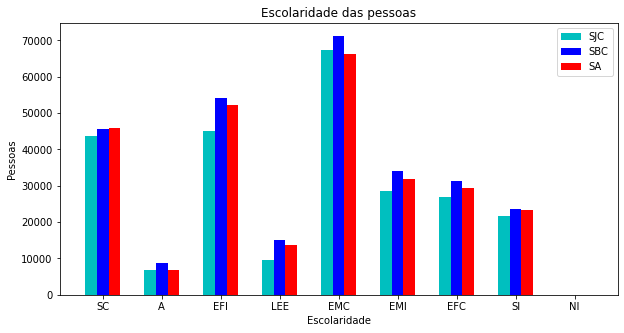

In [8]:
barlarg = 0.20

plt.figure(figsize=(10,5))

b1 = np.arange(len(escolaridade2))
b2 = [x + barlarg for x in b1]
b3 = [x + barlarg for x in b2]

plt.bar(b1, sjcqtd, color='c', width=barlarg, label='SJC')
plt.bar(b2, sbcqtd, color='b', width=barlarg, label='SBC')
plt.bar(b3, saqtd, color='r', width=barlarg, label='SA')

plt.xlabel('Escolaridade')
plt.xticks([r + barlarg for r in range(len(sjcqtd))], escolaridade2)
plt.ylabel('Pessoas')
plt.title('Escolaridade das pessoas')

plt.legend()
plt.show()

Criando um DataFrame para comparar a escolaridade entre pessoas do sexo Feminino e Masculino Em SJC

In [9]:
sjcfem = sjc.loc[sjc['DS_GENERO'] == 'FEMININO', ['DS_GRAU_ESCOLARIDADE']]
sjcmas = sjc.loc[sjc['DS_GENERO'] == 'MASCULINO', ['DS_GRAU_ESCOLARIDADE']]

Criando dicionários e listas para criar o gráfico.

In [10]:
sjcfemdic = {}
sjcfemlis = []
sjcmasdic = {}
sjcmaslis = []
for k in escolaridade:
    sjcfemdic[k] = 0
    sjcmasdic[k] = 0

for k in sjcfem["DS_GRAU_ESCOLARIDADE"].values:
    for i in  sjcfemdic:
        if k == i:
            sjcfemdic[i] += 1

for k in sjcmas["DS_GRAU_ESCOLARIDADE"].values:
    for i in  sjcmasdic:
        if k == i:
            sjcmasdic[i] += 1
            
for k in sjcfemdic: sjcfemlis.append(sjcfemdic[k])
for k in sjcmasdic: sjcmaslis.append(sjcmasdic[k])

SEXO | SC | A | EFI | LEE | EMC | EMI | EFC | SI | NI
------ | -- | - | --- | --- | --- | --- | --- | -- | --
FEMININO |24528| 4039| 24553| 5479 | 36184| 14601| 13923| 11450| 0
MASCULINO | 19022| 2694| 20432| 4105| 31069| 13973| 13088| 10128| 0


Criando o gráfico de comparação entre Feminino e Masculino.

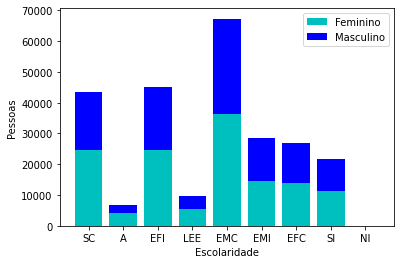

In [11]:
plt.bar(escolaridade2, sjcfemlis, color='c', label='Feminino')
plt.bar(escolaridade2, sjcmaslis, color='b', bottom=sjcfemlis, label='Masculino')
plt.xlabel('Escolaridade')
plt.ylabel('Pessoas')
plt.legend()
plt.show()